In [1]:
import pandas as pd

### Import data

In [2]:
df = pd.read_csv('../data/monthly_coffee_prices.csv', names=['Month', 'Grade', 'Price'])

In [3]:
df.reset_index(drop=True)

,Month,Grade,Price
0,October 2015,AA,236.98
1,October 2015,AB,211.06
2,October 2015,C,168.10
3,November 2015,AA,267.01
4,November 2015,AB,231.54
...,...,...,...
130,November 2016,AB,266.95
131,November 2016,C,236.97
132,December 2016,AA,289.41
133,December 2016,AB,267.78


#### Convert Month to datetime object

In [4]:
from datetime import datetime

In [5]:
def convert_to_datetime(month_year):
    dt = datetime.strptime(month_year, '%B %Y')
    return dt

In [6]:
df['Month'] = df['Month'].apply(convert_to_datetime)

In [7]:
df.head()

,Month,Grade,Price
1,2015-10-01,AA,236.98
2,2015-10-01,AB,211.06
3,2015-10-01,C,168.10
17,2015-11-01,AA,267.01
18,2015-11-01,AB,231.54


In [8]:
# Sort by date
df = df.sort_values(by='Month')
df.reset_index(drop=True)

,Month,Grade,Price
0,2014-10-01,C,232.12
1,2014-10-01,AB,254.42
2,2014-10-01,AA,310.71
3,2014-11-01,C,230.38
4,2014-11-01,AB,251.45
...,...,...,...
130,2018-08-01,AB,206.81
131,2018-08-01,AA,317.01
132,2018-09-01,AA,309.10
133,2018-09-01,C,123.65


In [9]:
df_aa = df.loc[df['Grade'] == 'AA'][['Month', 'Price']]

In [10]:
df_ab = df.loc[df['Grade'] == 'AB'][['Month', 'Price']]

In [11]:
df_c = df.loc[df['Grade'] == 'C'][['Month', 'Price']]

### Plot time series data

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

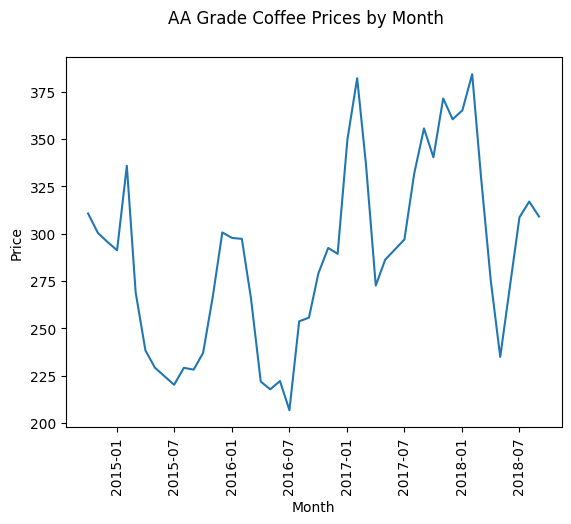

In [13]:
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Price')
plt.suptitle('AA Grade Coffee Prices by Month')
plt.plot(df_aa['Month'], df_aa['Price'])

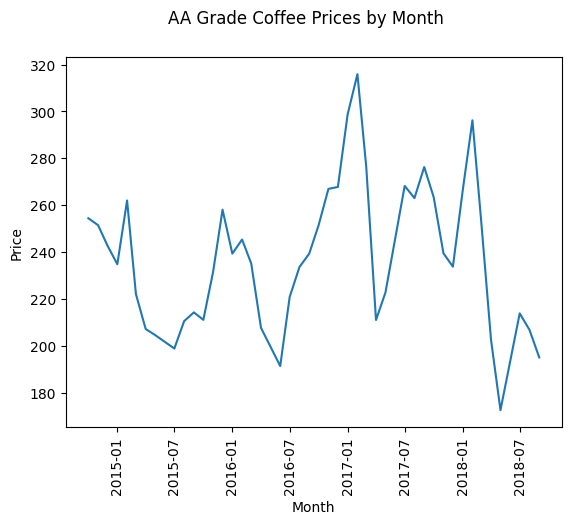

In [14]:
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Price')
plt.suptitle('AA Grade Coffee Prices by Month')
plt.plot(df_ab['Month'], df_ab['Price'])

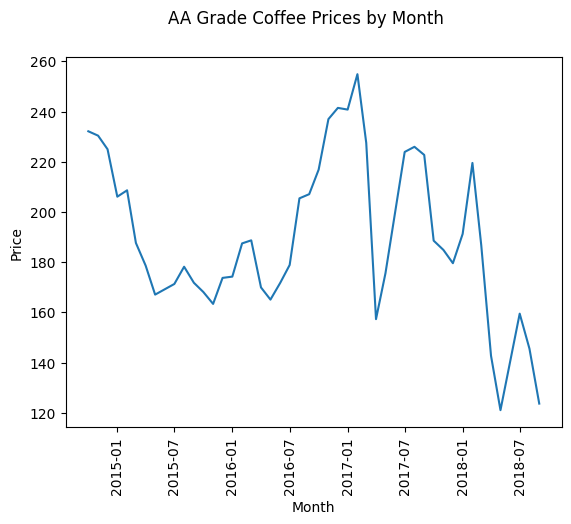

In [15]:
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Price')
plt.suptitle('AA Grade Coffee Prices by Month')
plt.plot(df_c['Month'], df_c['Price'])

Notes: Plots look somewhat similar. Likely this reflects a broader pattern for coffee prices in general.

## Forecast coffee prices for 2018-2019

In [16]:
from prophet import Prophet

c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
plt.style.use('fivethirtyeight')

In [19]:
# Prophet loks for these column names
rename_cols = {'Month': 'ds', 'Price': 'y'}

### AA Grade Coffee

In [20]:
# Format dataset for Prophet
df_aa = df_aa.reset_index(drop=True).rename(columns=rename_cols)

In [21]:
# 77% train/test split
# train_aa, test_aa = df_aa.iloc[:35], df_aa.iloc[35:]

In [21]:
df_aa

,ds,y
0,2014-10-01,310.71
1,2014-11-01,300.48
2,2014-12-01,295.75
3,2015-01-01,291.27
4,2015-02-01,335.90
5,2015-03-01,269.05
6,2015-04-01,238.38
7,2015-05-01,229.27
8,2015-07-01,220.20
9,2015-08-01,229.18


In [22]:
model_aa = Prophet()

In [23]:
model_aa.fit(df=df_aa)

11:05:07 - cmdstanpy - INFO - Chain [1] start processing
11:05:09 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Create dataframe to store the predictions for 2018-2019
future_aa = model_aa.make_future_dataframe(periods=365)

In [25]:
predictions_aa = model_aa.predict(future_aa)

In [26]:
predictions_aa

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,234.334611,233.987953,289.572538,234.334611,234.334611,26.829471,26.829471,26.829471,26.829471,26.829471,26.829471,0.0,0.0,0.0,261.164082
1,2014-11-01,235.754899,248.707358,305.487952,235.754899,235.754899,41.836576,41.836576,41.836576,41.836576,41.836576,41.836576,0.0,0.0,0.0,277.591476
2,2014-12-01,237.129372,258.293815,315.990387,237.129372,237.129372,49.977201,49.977201,49.977201,49.977201,49.977201,49.977201,0.0,0.0,0.0,287.106574
3,2015-01-01,238.549661,261.941221,317.321259,238.549661,238.549661,52.792112,52.792112,52.792112,52.792112,52.792112,52.792112,0.0,0.0,0.0,291.341773
4,2015-02-01,239.969949,283.014156,339.182880,239.969949,239.969949,71.018706,71.018706,71.018706,71.018706,71.018706,71.018706,0.0,0.0,0.0,310.988655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2019-08-28,350.671049,217.032032,274.236512,349.743564,351.616650,-106.052520,-106.052520,-106.052520,-106.052520,-106.052520,-106.052520,0.0,0.0,0.0,244.618528
406,2019-08-29,350.743079,235.975797,291.838998,349.813121,351.691295,-85.600009,-85.600009,-85.600009,-85.600009,-85.600009,-85.600009,0.0,0.0,0.0,265.143070
407,2019-08-30,350.815110,259.714100,317.653717,349.882854,351.767196,-62.396392,-62.396392,-62.396392,-62.396392,-62.396392,-62.396392,0.0,0.0,0.0,288.418718
408,2019-08-31,350.887140,285.274197,342.780312,349.952601,351.844642,-36.904977,-36.904977,-36.904977,-36.904977,-36.904977,-36.904977,0.0,0.0,0.0,313.982163


In [53]:
with open('../data/predictions_csv/predictions_aa.csv', 'w') as f:
    predictions_aa.to_csv(f)

c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


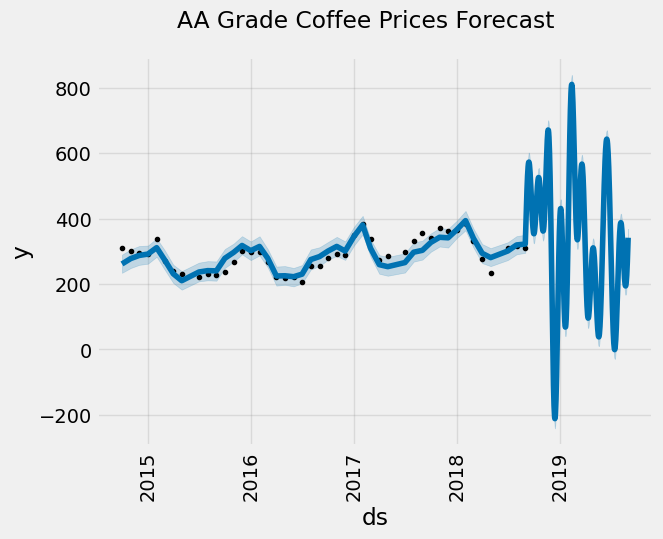

In [28]:
# Plot forecast
f, ax = plt.subplots(1)
plt.xticks(rotation=90)
plt.suptitle('AA Grade Coffee Prices Forecast')
fig = model_aa.plot(predictions_aa, ax=ax)

### AB Grade Coffee

In [29]:
# Format dataset for Prophet
df_ab = df_ab.reset_index(drop=True).rename(columns=rename_cols)

In [30]:
model_ab = Prophet()

In [31]:
model_ab.fit(df=df_ab)

11:05:54 - cmdstanpy - INFO - Chain [1] start processing


11:05:55 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# Create dataframe to store the predictions for 2018-2019
future_ab = model_ab.make_future_dataframe(periods=365)

In [33]:
predictions_ab = model_ab.predict(future_ab)

In [34]:
predictions_ab

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,208.974168,209.708520,247.362712,208.974168,208.974168,19.220497,19.220497,19.220497,19.220497,19.220497,19.220497,0.0,0.0,0.0,228.194665
1,2014-11-01,210.077508,215.910106,249.525255,210.077508,210.077508,23.532860,23.532860,23.532860,23.532860,23.532860,23.532860,0.0,0.0,0.0,233.610368
2,2014-12-01,211.145257,222.742790,259.378268,211.145257,211.145257,30.514164,30.514164,30.514164,30.514164,30.514164,30.514164,0.0,0.0,0.0,241.659421
3,2015-01-01,212.248597,224.025731,259.575287,212.248597,212.248597,29.506956,29.506956,29.506956,29.506956,29.506956,29.506956,0.0,0.0,0.0,241.755553
4,2015-02-01,213.351937,242.331017,277.503371,213.351937,213.351937,46.739208,46.739208,46.739208,46.739208,46.739208,46.739208,0.0,0.0,0.0,260.091146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2019-08-28,186.014318,116.772532,154.121381,182.233763,190.070585,-50.062544,-50.062544,-50.062544,-50.062544,-50.062544,-50.062544,0.0,0.0,0.0,135.951775
406,2019-08-29,185.939847,126.875175,161.766526,182.125708,190.012089,-42.213128,-42.213128,-42.213128,-42.213128,-42.213128,-42.213128,0.0,0.0,0.0,143.726719
407,2019-08-30,185.865375,135.729665,172.861163,182.034359,189.952092,-31.490796,-31.490796,-31.490796,-31.490796,-31.490796,-31.490796,0.0,0.0,0.0,154.374580
408,2019-08-31,185.790904,149.567806,187.271208,181.943010,189.896183,-18.095622,-18.095622,-18.095622,-18.095622,-18.095622,-18.095622,0.0,0.0,0.0,167.695282


In [54]:
with open('../data/predictions_csv/predictions_ab.csv', 'w') as f:
    predictions_ab.to_csv(f)

c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


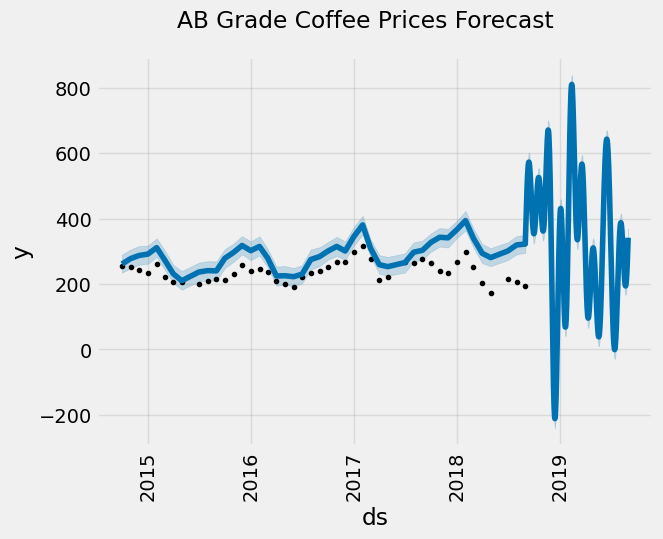

In [36]:
# Plot forecast
f, ax = plt.subplots(1)
plt.xticks(rotation=90)
plt.suptitle('AB Grade Coffee Prices Forecast')
fig = model_ab.plot(predictions_aa, ax=ax)

### C Grade Coffee

In [37]:
# Format dataset for Prophet
df_c = df_c.reset_index(drop=True).rename(columns=rename_cols)

In [38]:
model_c = Prophet()

In [39]:
model_c.fit(df=df_c)

11:06:40 - cmdstanpy - INFO - Chain [1] start processing


11:06:41 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# Create dataframe to store the predictions for 2018-2019
future_c = model_c.make_future_dataframe(periods=365)

In [41]:
predictions_c = model_c.predict(future_c)

In [42]:
predictions_c

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,197.175333,179.513321,243.736438,197.175333,197.175333,14.809689,14.809689,14.809689,14.809689,14.809689,14.809689,0.0,0.0,0.0,211.985022
1,2014-11-01,196.780174,179.685796,244.413775,196.780174,196.780174,15.548447,15.548447,15.548447,15.548447,15.548447,15.548447,0.0,0.0,0.0,212.328621
2,2014-12-01,196.397762,182.211581,243.732314,196.397762,196.397762,17.808248,17.808248,17.808248,17.808248,17.808248,17.808248,0.0,0.0,0.0,214.206010
3,2015-01-01,196.002603,175.667841,239.448713,196.002603,196.002603,13.223854,13.223854,13.223854,13.223854,13.223854,13.223854,0.0,0.0,0.0,209.226457
4,2015-02-01,195.607444,189.770922,253.439260,195.607444,195.607444,24.803298,24.803298,24.803298,24.803298,24.803298,24.803298,0.0,0.0,0.0,220.410742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2019-08-28,174.191057,75.138975,138.548489,174.185347,174.196905,-67.865614,-67.865614,-67.865614,-67.865614,-67.865614,-67.865614,0.0,0.0,0.0,106.325442
406,2019-08-29,174.178142,80.965265,144.942267,174.172399,174.184034,-61.743913,-61.743913,-61.743913,-61.743913,-61.743913,-61.743913,0.0,0.0,0.0,112.434228
407,2019-08-30,174.165226,91.192168,154.992463,174.159451,174.171142,-50.552867,-50.552867,-50.552867,-50.552867,-50.552867,-50.552867,0.0,0.0,0.0,123.612359
408,2019-08-31,174.152311,108.750276,169.037970,174.146504,174.158247,-34.444532,-34.444532,-34.444532,-34.444532,-34.444532,-34.444532,0.0,0.0,0.0,139.707780


In [55]:
with open('../data/predictions_csv/predictions_c.csv', 'w') as f:
    predictions_c.to_csv(f)

c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Addisalem_Hailegnaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


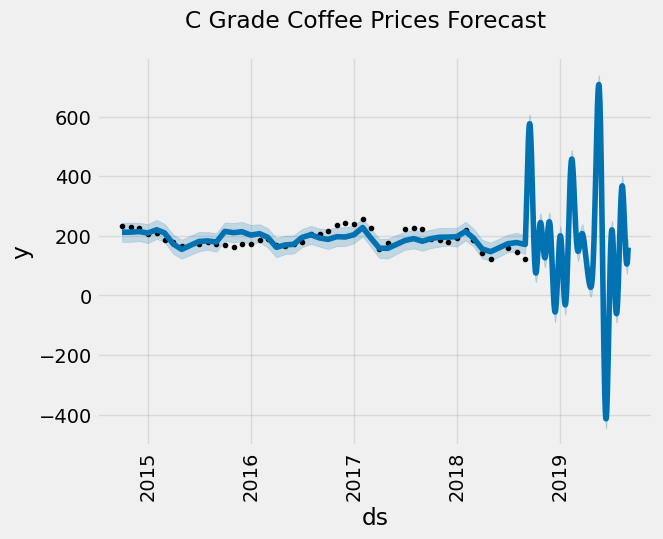

In [44]:
# Plot forecast
f, ax = plt.subplots(1)
plt.xticks(rotation=90)
plt.suptitle('C Grade Coffee Prices Forecast')
fig = model_c.plot(predictions_c, ax=ax)

In [56]:
# Read the CSV file
aa_df = pd.read_csv("../data/predictions_csv/predictions_aa.csv")

# Select the required columns
exported = aa_df[["ds", "yhat"]]

# Add an `id` column
exported['id'] = exported.index

exported = exported.rename(columns={"ds": "date"})
# Convert to JSON with the desired structure
json_result = exported.to_dict(orient='records')

# Save the JSON to a file
import json
with open("../data/predictions_json/predictions_aa.json", 'w') as f:
    json.dump(json_result, f, indent=4)

C:\Users\Addisalem_Hailegnaw\AppData\Local\Temp\ipykernel_1940\645932147.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exported['id'] = exported.index


In [57]:
# Read the CSV file
aa_df = pd.read_csv("../data/predictions_csv/predictions_ab.csv")

# Select the required columns
exported = aa_df[["ds", "yhat"]]

# Add an `id` column
exported['id'] = exported.index

exported = exported.rename(columns={"ds": "date"})
# Convert to JSON with the desired structure
json_result = exported.to_dict(orient='records')

# Save the JSON to a file
import json
with open("../data/predictions_json/predictions_ab.json", 'w') as f:
    json.dump(json_result, f, indent=4)

C:\Users\Addisalem_Hailegnaw\AppData\Local\Temp\ipykernel_1940\864048107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exported['id'] = exported.index


In [58]:
# Read the CSV file
aa_df = pd.read_csv("../data/predictions_csv/predictions_c.csv")

# Select the required columns
exported = aa_df[["ds", "yhat"]]

# Add an `id` column
exported['id'] = exported.index

exported = exported.rename(columns={"ds": "date"})
# Convert to JSON with the desired structure
json_result = exported.to_dict(orient='records')

# Save the JSON to a file
import json
with open("../data/predictions_json/predictions_c.json", 'w') as f:
    json.dump(json_result, f, indent=4)

C:\Users\Addisalem_Hailegnaw\AppData\Local\Temp\ipykernel_1940\2950901448.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exported['id'] = exported.index
